A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

https://scikit-learn.org/stable/modules/cross_validation.html

https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

https://www.datacamp.com/community/tutorials/random-forests-classifier-python?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=229765585186&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1005496&gclid=Cj0KCQjw5auGBhDEARIsAFyNm9H88OYor8GfVkrAMZ-dvl7XkMjYufbrBgh3lCYTJB_Pmxum2U91GYgaAgGBEALw_wcB

https://www.geeksforgeeks.org/solving-linear-regression-in-python/

In [523]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LogisticRegression
import scipy.stats
from scipy.stats import linregress
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

In [223]:
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")

df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


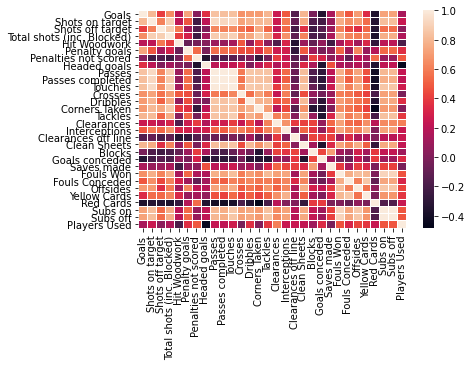

In [224]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, linewidths=1, xticklabels=1, yticklabels=1)
plt.show()

### Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

Las mejores correlaciones son entre Passes, Passes Completed and Touches. Also Subs On -> Subs Off

Otros correlaciones incluyen:
    Passes, Passes Completed, Touches ------>>> Goals, Shots on target, Total Shots

### ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles?

In [225]:
df["Shooting Accuracy"] = df["Shooting Accuracy"].apply(lambda x: float(x.split()[0].replace('%', '')))

In [226]:
df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [227]:
df.sort_values(by=['Goals'], inplace=True)
X = df["Goals"]
y = df["Shooting Accuracy"]
X = X.to_numpy().reshape(-1, 1)
y = y.to_numpy().reshape(-1, 1)

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [229]:
goalsaccuracy = LinearRegression(n_jobs=-1)

In [230]:
t_train = np.around(y_train)
t_train = t_train.astype(int).ravel()
t_test = np.around(y_test)
t_test = t_test.astype(int).ravel()
clf = svm.SVC(kernel='linear', C=1).fit(X_train, t_train)
clf.score(X_test, t_test)

0.0

In [231]:
goalsaccuracy.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [232]:
degree = 3
model = make_pipeline(PolynomialFeatures(degree), Ridge())

model.fit(X_train, y_train)
y_plot = model.predict(X)

In [233]:
y2  = y_train.ravel()

In [234]:
svr_poly = SVR(kernel='poly', C=1.0, gamma=2, degree=3, epsilon=0.1)
modelpoly = svr_poly.fit(X_train, y2)
y_prediction = modelpoly.predict(X)

linear.score: 0.2498569096171962
poly.score: 0.16143722538346927
svr.score: 0.09664421974591586


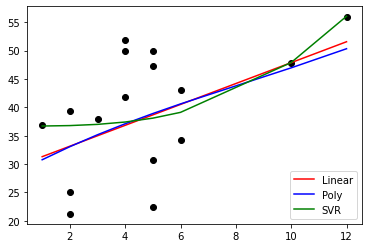

In [235]:
plt.scatter(X, y, color='black')
plt.plot(X, goalsaccuracy.predict(X), color='red', label="Linear")
plt.plot(X, y_plot, color='blue', label="Poly")
plt.plot(X, y_prediction, color='green', label="SVR")
print("linear.score:", goalsaccuracy.score(X, y)) 
print("poly.score:", model.score(X_train, y_train))
print("svr.score:", modelpoly.score(X_train, y_train))
plt.legend(loc='lower right')

In [296]:
print('Coefficients Goals per % Shooting: \n', goalsaccuracy.coef_)

Coefficients Goals per % Shooting: 
 [[1.84278146]]


In [236]:
print(cross_val_score(goalsaccuracy, X, encoded, cv=4))

#accuracy_score(y_test, y_pred) 

[-1.14019323 -2.28966136 -0.08733458  0.14797906]


## Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

% de goles por disparo: 40%

Total shots (inc. Blocked): 102

Corners Taken: 5

Passes: 82

Dribbles: 23

In [243]:
df["% Goals-to-shots"] = df["% Goals-to-shots"].apply(lambda x: float(x.split()[0].replace('%', '')))

In [306]:
y = df[["Goals"]]

In [464]:
X = df[["% Goals-to-shots"]]
TS = df[["Total shots (inc. Blocked)"]]
COR = df[["Corners Taken"]]
PAS = df[["Passes"]]
DRI = df[["Dribbles"]]

## % de goles por disparo

In [340]:
ols = linear_model.LinearRegression()
ols.fit(X, y)
linr = ols.predict(X)

In [465]:
g2glr_pred2 = lrg2s.predict([[40]])
g2gsvm_pred2 = g2ssvm.predict([[40]])
g2grf_pred2 = g2grf.predict([[40]])

In [466]:
# LR Test Split
X_lrtrain, X_lrtest, y_lrtrain, y_lrtest = train_test_split(X, y, test_size=0.4)

In [467]:
# Logistic regression
lrg2s = LogisticRegression(solver="lbfgs", random_state=10, max_iter=1000)
lrg2s.fit(X_train, y_train)
g2slr_pred = lrg2s.predict(X)

C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [468]:
# SVM Test Split
X_svmtrain, X_svmtest, y_svmtrain, y_svmtest = train_test_split(X, y, test_size=0.4)

In [469]:
# SVM
g2ssvm = svm.SVC(kernel='rbf', degree=6, gamma="scale")
g2ssvm.fit(X_svmtrain, y_svmtrain)
g2ssvm_pred = g2ssvm.predict(X)
g2ssvm_pre = g2ssvm.predict(X_svmtest)

C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [470]:
# Random Forest Test Split
X_rftrain, X_rftest, y_rftrain, y_rftest = train_test_split(X, y, test_size=0.4)

In [471]:
# Random Forest
g2grf = RandomForestClassifier(n_estimators=100)
g2grf.fit(X_rftrain,y_rftrain)
g2srf_pred = g2grf.predict(X)
g2srf_pre = g2grf.predict(X_rftest)

ipykernel_launcher:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


% Goals-to-shots: 
 [ 5.2  4.1  5.2  6.   6.5 16.  12.9 20.  17.2 19.2 12.5 13.8  7.5  9.3
 15.6 16. ]
--------------
Actual Goals: 
 [ 1  2  2  2  3  4  4  4  5  5  5  5  6  6 10 12]
--------------
Predictions for Goals from Goals-to-shots using logistic regression: 
 [2 2 2 2 3 5 5 5 5 5 5 5 3 6 5 5]
Predictions for Goals from Goals-to-shots using svm: 
 [6 6 6 6 6 5 5 5 5 5 5 5 6 6 5 5]
Predictions for Goals from Goals-to-shots using rf: 
 [ 2  2  2  2  2 12  4  4  5  5  5  5  6  6 12 12]
--------------
Prediction for Goals from Goals-to-shots '40%' using logistic regression: 
 [5]
Prediction for Goals from Goals-to-shots '40%' using svm: 
 [5]
Prediction for Goals from Goals-to-shots '40%' using rf: 
 [4]
--------------
Score using logistic regression: 
 0.5625
Score using svm: 
 0.375
Score using rf: 
 0.75
--------------
Accuracy using svm: 
 0.14285714285714285
Accuracy using rf: 
 0.42857142857142855


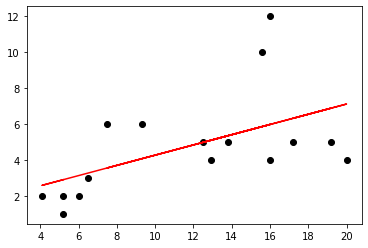

In [472]:

print("================================================================")
print("% Goals-to-shots: \n", df["% Goals-to-shots"].to_numpy())
print("--------------")
print("Actual Goals: \n", df["Goals"].to_numpy())
print("--------------")
print("Predictions for Goals from Goals-to-shots using logistic regression: \n", g2slr_pred)
print("Predictions for Goals from Goals-to-shots using svm: \n", g2ssvm_pred)
print("Predictions for Goals from Goals-to-shots using rf: \n", g2srf_pred)
print("--------------")
print("Prediction for Goals from Goals-to-shots '40%' using logistic regression: \n", g2glr_pred2)
print("Prediction for Goals from Goals-to-shots '40%' using svm: \n", g2gsvm_pred2)
print("Prediction for Goals from Goals-to-shots '40%' using rf: \n", g2grf_pred2)
print("--------------")
print("Score using logistic regression: \n", lrg2s.score(X, y))
print("Score using svm: \n", g2ssvm.score(X, y))
print("Score using rf: \n", g2grf.score(X, y))
print("--------------")
print("Accuracy using svm: \n", metrics.accuracy_score(y_svmtest, g2ssvm_pre))
print("Accuracy using rf: \n", metrics.accuracy_score(y_rftest, g2srf_pre))
plt.scatter(X, y, color='black')
plt.plot(X, linr, color='red')
print("================================================================")

## Total shots (inc. Blocked): 102

In [474]:
TSols = linear_model.LinearRegression()
TSols.fit(TS, y)
linrTS = TSols.predict(TS)

In [477]:
TSlr_pred2 = lrTS.predict([[102]])
TSsvm_pred2 = TSsvm.predict([[102]])
TSrf_pred2 = TSrf.predict([[102]])

In [481]:
# LR Test Split
X_lrtrain, X_lrtest, y_lrtrain, y_lrtest = train_test_split(TS, y, test_size=0.4)
# Logistic regression
lrTS = LogisticRegression(solver="lbfgs", random_state=10, max_iter=1000)
lrTS.fit(X_lrtrain, y_lrtrain)
TSlr_pred = lrTS.predict(TS)
# SVM Test Split
X_svmtrain, X_svmtest, y_svmtrain, y_svmtest = train_test_split(TS, y, test_size=0.4)
# SVM
TSsvm = svm.SVC(kernel='rbf', degree=6, gamma="scale")
TSsvm.fit(X_svmtrain, y_svmtrain)
TSsvm_pred = TSsvm.predict(TS)
TSsvm_pre = TSsvm.predict(X_svmtest)
# Random Forest Test Split
X_rftrain, X_rftest, y_rftrain, y_rftest = train_test_split(TS, y, test_size=0.4)
# Random Forest
TSrf = RandomForestClassifier(n_estimators=100)
TSrf.fit(X_rftrain,y_rftrain)
TSrf_pred = TSrf.predict(TS)
TSrf_pre = TSrf.predict(X_rftest)

C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
ipykernel_launcher:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Total shots: 
 [ 28  60  48  38  65  32  39  27  40  32  59  39 110  82  80 100]
--------------
Actual Goals: 
 [ 1  2  2  2  3  4  4  4  5  5  5  5  6  6 10 12]
--------------
Predictions for Goals from Total shots using logistic regression: 
 [ 4  5  5  5 10  4  5  4  5  4  5  5  6 10 10 12]
Predictions for Goals from Total shots using svm: 
 [ 5  5  5  5  5  5  5  5  5  5  5  5 12  6  6 12]
Predictions for Goals from Total shots using rf: 
 [ 1  2  2  2  3  5  2  1  2  5  5  2  6  3  3 12]
--------------
Prediction for Goals from Total shots '102' using logistic regression: 
 [5]
Prediction for Goals from Total shots '102' using svm: 
 [6]
Prediction for Goals from Total shots '102' using rf: 
 [12]
--------------
Score using logistic regression: 
 0.5
Score using svm: 
 0.375
Score using rf: 
 0.5625
--------------
Accuracy using svm: 
 0.14285714285714285
Accuracy using rf: 
 0.0


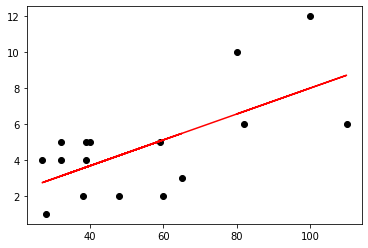

In [483]:
print("================================================================")
print("Total shots: \n", df["Total shots (inc. Blocked)"].to_numpy())
print("--------------")
print("Actual Goals: \n", df["Goals"].to_numpy())
print("--------------")
print("Predictions for Goals from Total shots using logistic regression: \n", TSlr_pred)
print("Predictions for Goals from Total shots using svm: \n", TSsvm_pred)
print("Predictions for Goals from Total shots using rf: \n", TSrf_pred)
print("--------------")
print("Prediction for Goals from Total shots '102' using logistic regression: \n", TSlr_pred2)
print("Prediction for Goals from Total shots '102' using svm: \n", TSsvm_pred2)
print("Prediction for Goals from Total shots '102' using rf: \n", TSrf_pred2)
print("--------------")
print("Score using logistic regression: \n", lrTS.score(TS, y))
print("Score using svm: \n", TSsvm.score(TS, y))
print("Score using rf: \n", TSrf.score(TS, y))
print("--------------")
print("Accuracy using svm: \n", metrics.accuracy_score(y_svmtest, TSsvm_pre))
print("Accuracy using rf: \n", metrics.accuracy_score(y_rftest, TSrf_pre))
plt.scatter(TS, y, color='black')
plt.plot(TS, linrTS, color='red')
print("================================================================")

## Corners Taken: 5

In [484]:
CORols = linear_model.LinearRegression()
CORols.fit(COR, y)
linrCOR = CORols.predict(COR)

In [487]:
CORlr_pred2 = lrCOR.predict([[5]])
CORsvm_pred2 = CORsvm.predict([[5]])
CORrf_pred2 = CORrf.predict([[5]])

In [492]:
# LR Test Split
X_lrtrain, X_lrtest, y_lrtrain, y_lrtest = train_test_split(COR, y, test_size=0.4)
# Logistic regression
lrCOR = LogisticRegression(max_iter=1000)
lrCOR.fit(X_lrtrain, y_lrtrain)
CORlr_pred = lrCOR.predict(COR)
# SVM Test Split
X_svmtrain, X_svmtest, y_svmtrain, y_svmtest = train_test_split(COR, y, test_size=0.4)
# SVM
CORsvm = svm.SVC(degree=6)
CORsvm.fit(X_svmtrain, y_svmtrain)
CORsvm_pred = CORsvm.predict(COR)
CORsvm_pre = CORsvm.predict(X_svmtest)
# Random Forest Test Split
X_rftrain, X_rftest, y_rftrain, y_rftest = train_test_split(COR, y, test_size=0.4)
# Random Forest
CORrf = RandomForestClassifier(n_estimators=100)
CORrf.fit(X_rftrain,y_rftrain)
CORrf_pred = CORrf.predict(COR)
CORrf_pre = CORrf.predict(X_rftest)

C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
ipykernel_launcher:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Corners Taken: 
 [ 8 22 14 18 28 14 21 16 16 10 21  7 30 41 35 44]
--------------
Actual Goals: 
 [ 1  2  2  2  3  4  4  4  5  5  5  5  6  6 10 12]
--------------
Predictions for Goals using Corners Taken using logistic regression: 
 [5 2 2 2 3 2 2 2 2 5 2 5 3 6 6 6]
Predictions for Goals using Corners Taken using svm: 
 [ 4  4  4  4  4  4  4  4  4  4  4  4  3  6 10 12]
Predictions for Goals using Corners Taken using rf: 
 [ 5  2  4  5  3  4  2  5  5  5  2  5  6 12  6 12]
--------------
Prediction for Goals using Corners Taken '5' using logistic regression: 
 [1]
Prediction for Goals using Corners Taken '5' using svm: 
 [4]
Prediction for Goals using Corners Taken '5' using rf: 
 [1]
--------------
Score using logistic regression: 
 0.4375
Score using svm: 
 0.375
Score using rf: 
 0.5
--------------
Accuracy using svm: 
 0.14285714285714285
Accuracy using rf: 
 0.14285714285714285


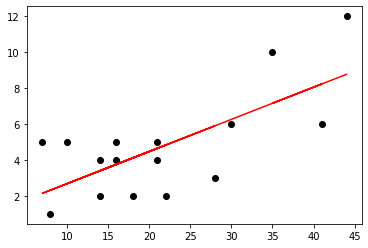

In [493]:
print("================================================================")
print("Corners Taken: \n", df["Corners Taken"].to_numpy())
print("--------------")
print("Actual Goals: \n", df["Goals"].to_numpy())
print("--------------")
print("Predictions for Goals using Corners Taken using logistic regression: \n", CORlr_pred)
print("Predictions for Goals using Corners Taken using svm: \n", CORsvm_pred)
print("Predictions for Goals using Corners Taken using rf: \n", CORrf_pred)
print("--------------")
print("Prediction for Goals using Corners Taken '5' using logistic regression: \n", CORlr_pred2)
print("Prediction for Goals using Corners Taken '5' using svm: \n", CORsvm_pred2)
print("Prediction for Goals using Corners Taken '5' using rf: \n", CORrf_pred2)
print("--------------")
print("Score using logistic regression: \n", lrCOR.score(COR, y))
print("Score using svm: \n", CORsvm.score(COR, y))
print("Score using rf: \n", CORrf.score(COR, y))
print("--------------")
print("Accuracy using svm: \n", metrics.accuracy_score(y_svmtest, CORsvm_pre))
print("Accuracy using rf: \n", metrics.accuracy_score(y_rftest, CORrf_pre))
plt.scatter(COR, y, color='black')
plt.plot(COR, linrCOR, color='red')
print("================================================================")

## Passes: 82

In [495]:
PASols = linear_model.LinearRegression()
PASols.fit(PAS, y)
linrPAS = PASols.predict(PAS)

In [498]:
PASlr_pred2 = lrPAS.predict([[82]])
PASsvm_pred2 = PASsvm.predict([[82]])
PASrf_pred2 = PASrf.predict([[82]])

In [496]:
# LR Test Split
X_lrtrain, X_lrtest, y_lrtrain, y_lrtest = train_test_split(PAS, y, test_size=0.25)
# Logistic regression
lrPAS = LogisticRegression(max_iter=1000)
lrPAS.fit(X_lrtrain, y_lrtrain)
PASlr_pred = lrPAS.predict(PAS)
# SVM Test Split
X_svmtrain, X_svmtest, y_svmtrain, y_svmtest = train_test_split(PAS, y, test_size=0.25)
# SVM
PASsvm = svm.SVC(degree=6)
PASsvm.fit(X_svmtrain, y_svmtrain)
PASsvm_pred = PASsvm.predict(PAS)
PASsvm_pre = PASsvm.predict(X_svmtest)
# Random Forest Test Split
X_rftrain, X_rftest, y_rftrain, y_rftest = train_test_split(PAS, y, test_size=0.25)
# Random Forest
PASrf = RandomForestClassifier(n_estimators=100)
PASrf.fit(X_rftrain,y_rftrain)
PASrf_pred = PASrf.predict(PAS)
PASrf_pre = PASrf.predict(X_rftest)

C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
ipykernel_launcher:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Passes: 
 [ 851 1556 1059 1276 2066 1076 1565 1298 1488 1187 1602 1192 3016 1891
 2774 4317]
--------------
Actual Goals: 
 [ 1  2  2  2  3  4  4  4  5  5  5  5  6  6 10 12]
--------------
Predictions for Goals using Passes using logistic regression: 
 [ 1  5  4  2  6  2  5  2  2  2  5  2 10  6  6 12]
Predictions for Goals using Passes using svm: 
 [ 5  5  5  5  3  5  5  5  5  5  5  5 10  5 10  5]
Predictions for Goals using Passes using rf: 
 [ 2  4  2  2  6  4  4  4  5  5  4  5  6  6 10 12]
--------------
Prediction for Goals using Passes '82' using logistic regression: 
 [1]
Prediction for Goals using Passes '82' using svm: 
 [5]
Prediction for Goals using Passes '82' using rf: 
 [2]
--------------
Score using logistic regression: 
 0.3125
Score using svm: 
 0.375
Score using rf: 
 0.75
--------------
Accuracy using svm: 
 0.0
Accuracy using rf: 
 0.0


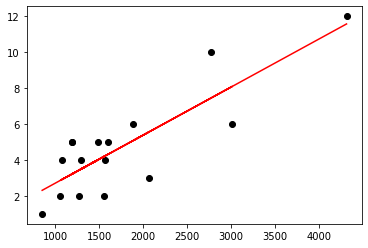

In [500]:
print("================================================================")
print("Passes: \n", df["Passes"].to_numpy())
print("--------------")
print("Actual Goals: \n", df["Goals"].to_numpy())
print("--------------")
print("Predictions for Goals using Passes using logistic regression: \n", PASlr_pred)
print("Predictions for Goals using Passes using svm: \n", PASsvm_pred)
print("Predictions for Goals using Passes using rf: \n", PASrf_pred)
print("--------------")
print("Prediction for Goals using Passes '82' using logistic regression: \n", PASlr_pred2)
print("Prediction for Goals using Passes '82' using svm: \n", PASsvm_pred2)
print("Prediction for Goals using Passes '82' using rf: \n", PASrf_pred2)
print("--------------")
print("Score using logistic regression: \n", lrPAS.score(PAS, y))
print("Score using svm: \n", PASsvm.score(PAS, y))
print("Score using rf: \n", PASrf.score(PAS, y))
print("--------------")
print("Accuracy using svm: \n", metrics.accuracy_score(y_svmtest, PASsvm_pre))
print("Accuracy using rf: \n", metrics.accuracy_score(PAS, y))
plt.scatter(PAS, y, color='black')
plt.plot(PAS, linrPAS, color='red')
print("================================================================")

## Dribbles: 23

In [501]:
DRIols = linear_model.LinearRegression()
DRIols.fit(DRI, y)
linrDRI = DRIols.predict(DRI)

In [506]:
DRIlr_pred2 = lrDRI.predict([[23]])
DRIsvm_pred2 = DRIsvm.predict([[23]])
DRIrf_pred2 = DRIrf.predict([[23]])

In [505]:
# LR Test Split
X_lrtrain, X_lrtest, y_lrtrain, y_lrtest = train_test_split(DRI, y, test_size=0.25)
# Logistic regression
lrDRI = LogisticRegression(max_iter=1500)
lrDRI.fit(X_lrtrain, y_lrtrain)
DRIlr_pred = lrDRI.predict(DRI)
# SVM Test Split
X_svmtrain, X_svmtest, y_svmtrain, y_svmtest = train_test_split(DRI, y, test_size=0.25)
# SVM
DRIsvm = svm.SVC(degree=6)
DRIsvm.fit(X_svmtrain, y_svmtrain)
DRIsvm_pred = DRIsvm.predict(DRI)
DRIsvm_pre = DRIsvm.predict(X_svmtest)
# Random Forest Test Split
X_rftrain, X_rftest, y_rftrain, y_rftest = train_test_split(DRI, y, test_size=0.25)
# Random Forest
DRIrf = RandomForestClassifier(n_estimators=100)
DRIrf.fit(X_rftrain,y_rftrain)
DRIrf_pred = DRIrf.predict(DRI)
DRIrf_pre = DRIrf.predict(X_rftest)

C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was 

Dribbles: 
 [ 18  49  39  26  76  42  68  32  60  53  40  29  75  64  60 106]
--------------
Actual Goals: 
 [ 1  2  2  2  3  4  4  4  5  5  5  5  6  6 10 12]
--------------
Predictions for Goals using Dribbles using logistic regression: 
 [ 1  4  2  2  3  2  4  2  4  4  2  2  6  4  4 12]
Predictions for Goals using Dribbles using svm: 
 [ 2  2  2  2  6  2  6  2  6  2  2  2  6  6  6 12]
Predictions for Goals using Dribbles using rf: 
 [ 1  2  2  5  3  4  6  4  5  5  2  5  6  6  5 12]
--------------
Prediction for Goals using Dribbles '23' using logistic regression: 
 [1]
Prediction for Goals using Dribbles '23' using svm: 
 [2]
Prediction for Goals using Dribbles '23' using rf: 
 [1]
--------------
Score using logistic regression: 
 0.4375
Score using svm: 
 0.375
Score using rf: 
 0.75
--------------
Accuracy using svm: 
 0.0
Accuracy using rf: 
 0.0


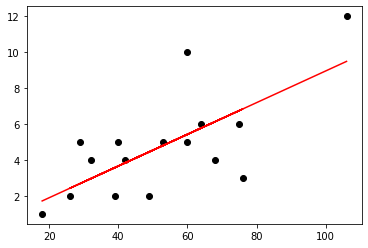

In [507]:
print("================================================================")
print("Dribbles: \n", df["Dribbles"].to_numpy())
print("--------------")
print("Actual Goals: \n", df["Goals"].to_numpy())
print("--------------")
print("Predictions for Goals using Dribbles using logistic regression: \n", DRIlr_pred)
print("Predictions for Goals using Dribbles using svm: \n", DRIsvm_pred)
print("Predictions for Goals using Dribbles using rf: \n", DRIrf_pred)
print("--------------")
print("Prediction for Goals using Dribbles '23' using logistic regression: \n", DRIlr_pred2)
print("Prediction for Goals using Dribbles '23' using svm: \n", DRIsvm_pred2)
print("Prediction for Goals using Dribbles '23' using rf: \n", DRIrf_pred2)
print("--------------")
print("Score using logistic regression: \n", lrDRI.score(DRI, y))
print("Score using svm: \n", DRIsvm.score(DRI, y))
print("Score using rf: \n", DRIrf.score(DRI, y))
print("--------------")
print("Accuracy using svm: \n", metrics.accuracy_score(y_svmtest, DRIsvm_pre))
print("Accuracy using rf: \n", metrics.accuracy_score(DRI, y))
plt.scatter(DRI, y, color='black')
plt.plot(DRI, linrDRI, color='red')
print("================================================================")

## Utilizando todas las columnas juntas:

In [ ]:
X = df[["% Goals-to-shots"]]

X = df[["% Goals-to-shots"]]
TS = df[["Total shots (inc. Blocked)"]]
COR = df[["Corners Taken"]]
PAS = df[["Passes"]]
DRI = df[["Dribbles"]]

In [510]:
X = np.array(df[["% Goals-to-shots", "Total shots (inc. Blocked)", "Corners Taken", "Passes", "Dribbles"]])
y = np.array(df['Goals'])

In [533]:
# LR Test Split
X_lrtrain, X_lrtest, y_lrtrain, y_lrtest = train_test_split(X, y, test_size=0.25, random_state=1)
# Logistic regression
lrX = LogisticRegression(max_iter=2000)
lrX.fit(X_lrtrain, y_lrtrain)
Xlr_pred = lrX.predict(X)
# SVM Test Split
X_svmtrain, X_svmtest, y_svmtrain, y_svmtest = train_test_split(X, y, test_size=0.25, random_state=1)
# SVM
Xsvm = svm.SVC(degree=3)
Xsvm.fit(X_svmtrain, y_svmtrain)
Xsvm_pred = Xsvm.predict(X)
Xsvm_pre = Xsvm.predict(X_svmtest)
# Random Forest Test Split
X_rftrain, X_rftest, y_rftrain, y_rftest = train_test_split(X, y, test_size=0.25)
# Random Forest
Xrf = RandomForestClassifier(n_estimators=100)
Xrf.fit(X_rftrain,y_rftrain)
Xrf_pred = Xrf.predict(X)
Xrf_pre = Xrf.predict(X_rftest)

C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [520]:
Xlr_pred2 = lrX.predict([[40.0,102,5,82,23]])
Xsvm_pred2 = Xsvm.predict([[40.0,102,5,82,23]])
Xrf_pred2 = Xrf.predict([[40.0,102,5,82,23]])

In [ ]:
#kfold = model_selection.KFold()
#name='Logistic Regression'
#cv_resultslr = model_selection.cross_val_score(lrX, X_lrtrain, y_lrtrain, cv=kfold, scoring='accuracy')
#msg = "%s: %f %s (%f)" % (name, cv_resultslr.mean(), "+-", cv_resultslr.std())

In [534]:
print("================================================================")
print("Actual Goals: \n", df["Goals"].to_numpy())
print("--------------")
print("Predictions for Goals using ALL using logistic regression: \n", Xlr_pred)
print("Predictions for Goals using ALL using svm: \n", Xsvm_pred)
print("Predictions for Goals using ALL using rf: \n", Xrf_pred)
print("--------------")
print("Prediction for Goals using ALL using logistic regression: \n", Xlr_pred2)
print("Prediction for Goals using ALL using svm: \n", Xsvm_pred2)
print("Prediction for Goals using ALL using rf: \n", Xrf_pred2)
print("--------------")
print("Score using logistic regression: \n", lrX.score(X, y))
print("Score using svm: \n", Xsvm.score(X, y))
print("Score using rf: \n", Xrf.score(X, y))
print("--------------")
print("================================================================")

Actual Goals: 
 [ 1  2  2  2  3  4  4  4  5  5  5  5  6  6 10 12]
--------------
Predictions for Goals using ALL using logistic regression: 
 [ 1  2  2  1  3  4  4  5  5  5  5  5  6  2 10 12]
Predictions for Goals using ALL using svm: 
 [ 5  5  5  5  5  5  5  5  5  5  5  5  5  5  5 12]
Predictions for Goals using ALL using rf: 
 [ 1  2  2  2  3  4  5  4  5  5  5  5  6  3 10 12]
--------------
Prediction for Goals using ALL using logistic regression: 
 [6]
Prediction for Goals using ALL using svm: 
 [5]
Prediction for Goals using ALL using rf: 
 [5]
--------------
Score using logistic regression: 
 0.8125
Score using svm: 
 0.3125
Score using rf: 
 0.875
--------------
